#  Project 5 - Client Segmentation for Olist

## Project Objectives

- Create a segmentation of clients that Olist can use in its communication campaigns
- Provide an actionable description of client segmentation
- Suggest a maintenance contract for the clusters

Data: https://www.kaggle.com/olistbr/brazilian-ecommerce#olist_order_items_dataset.csv <br>
Assignment: https://openclassrooms.com/fr/projects/630/assignment

## Data Analysis and Clustering

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [33]:
# Set up environment
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize'] = [14, 6]

In [34]:
df = pd.read_csv(f'project_cluster_input.csv')

In [35]:
# Drop auto-generated index columns
df.drop(columns=['Unnamed: 0', 'customer_unique_id',
                 'last_purchase_date'], inplace=True)

In [36]:
df.head(10)

,customer_lat,customer_lng,number_of_orders,number_of_items,amount_paid,freight_amount_paid,average_review_score,average_delivery_time,average_number_of_payments,average_payment_installments,Automobile,Beauty,Children,Construction,Electronics,Entertainment,Food,Home,Other,Pets,Professional,Sports,Travel,boleto,credit_card,debit_card,voucher,avg_delivery_delay,carrier_avg_delay,product_category_name_english,payment_type
0,-23.337679,-46.826739,1,1,129.90,12.00,5.0,6.0,1.0,8.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,141.90,0.0,0.0,0.00,0.00,0.0,0.00,141.90,0.0,0.0,-5.0,-4.0,Home,credit_card
1,-23.557876,-46.788754,1,1,18.90,8.29,4.0,2.0,1.0,1.0,0.0,27.19,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,27.19,0.0,0.0,-5.0,-3.0,Beauty,credit_card
2,-27.543787,-48.631973,1,1,69.00,17.22,3.0,25.0,1.0,8.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,86.22,0.00,0.0,0.00,86.22,0.0,0.0,-2.0,-3.0,Professional,credit_card
3,-1.307764,-48.482884,1,1,25.99,17.63,4.0,20.0,1.0,4.0,0.0,0.00,0.0,0.0,43.62,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,43.62,0.0,0.0,-12.0,-6.0,Electronics,credit_card
4,-23.506140,-47.470475,1,1,180.00,16.89,5.0,13.0,1.0,6.0,0.0,0.00,0.0,0.0,196.89,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,196.89,0.0,0.0,-8.0,-7.0,Electronics,credit_card
5,-23.516527,-46.687371,1,1,154.00,12.98,4.0,1.0,1.0,8.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,166.98,0.0,0.0,0.00,0.00,0.0,0.00,166.98,0.0,0.0,-12.0,-5.0,Home,credit_card
6,-22.823368,-47.088010,1,1,27.99,7.39,4.0,2.0,1.0,1.0,0.0,0.00,0.0,0.0,35.38,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,35.38,0.00,0.0,0.0,-12.0,-7.0,Electronics,boleto
7,-25.429617,-49.279342,1,2,382.00,37.18,1.0,16.0,1.0,3.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,419.18,0.0,0.00,419.18,0.0,0.0,-10.0,-5.0,Sports,credit_card
8,-22.400949,-42.988322,1,1,135.00,15.12,4.0,4.0,1.0,3.0,0.0,150.12,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,150.12,0.0,0.0,-28.0,-4.0,Beauty,credit_card
9,-2.547270,-44.230140,1,1,104.90,24.86,1.0,53.0,1.0,4.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,129.76,0.0,0.00,129.76,0.0,0.0,31.0,-3.0,Sports,credit_card


In [37]:
# Making 3 datasets with different features to see what seems to work best

# Full set
from sklearn.preprocessing import OneHotEncoder
df1 = df.drop(columns=['product_category_name_english', 'payment_type']).copy()

# No payment type and category information
df2 = df.drop(columns=['Automobile',
                       'Beauty',
                       'Children',
                       'Construction',
                       'Electronics',
                       'Entertainment',
                       'Food',
                       'Home',
                       'Other',
                       'Pets',
                       'Professional',
                       'Sports',
                       'Travel',
                       'boleto',
                       'credit_card',
                       'debit_card',
                       'voucher',
                       'product_category_name_english',
                       'payment_type'
                       ]).copy()

# One-Hot Encoding for Max category and max payment

enc = OneHotEncoder(handle_unknown='ignore')  # Create encoder
# Create a data frame with the one-hot encoded values
encoding = enc.fit_transform(
    df[['product_category_name_english', 'payment_type']])
# Transform the information in the fitted object to an array
encoding = encoding.toarray()
# Make data frame with one-hot encoded info
enc_df = pd.DataFrame(encoding, columns=enc.get_feature_names())
df3 = df2.join(enc_df)  # Re-attach it to df2 where we removed all of this info

In [38]:
# Based on a number of different tests, it was determined that dataset 3 provided the best clusters
current_df = df3

### Principal Component Analysis

In [39]:
# Scaling the numerical data
from sklearn.preprocessing import StandardScaler

X_scaled = current_df.copy()
scaler = StandardScaler()
X_scaled[X_scaled.columns] = scaler.fit_transform(X_scaled[X_scaled.columns])

In [40]:
# Creating PCA
from sklearn import decomposition

pca = decomposition.PCA(random_state=42)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [41]:
# Making list of principal components
comps = list(range(X_scaled.shape[1]))
comps = [item+1 for item in comps]

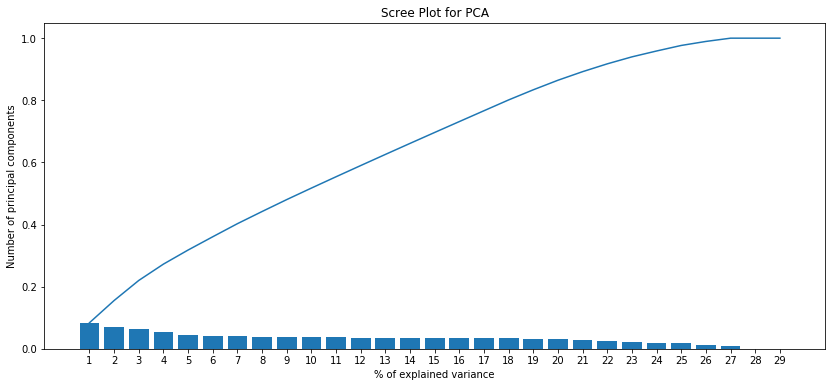

In [42]:
# Scree plot
plt.title("Scree Plot for PCA")
plt.xticks(comps)
plt.xlabel("% of explained variance")
plt.ylabel("Number of principal components")
plt.bar(comps, pca.explained_variance_ratio_)  # Plot bars
# Plot cumulative percentage
plt.plot(comps, pca.explained_variance_ratio_.cumsum())
plt.show()

In [43]:
# See cumulative explained variance
pca.explained_variance_ratio_.cumsum()

array([0.08382926, 0.15540921, 0.22005239, 0.27261219, 0.31796625,
       0.3606902 , 0.40277109, 0.44192709, 0.4803404 , 0.51737075,
       0.55385073, 0.58991734, 0.62571474, 0.66123647, 0.69647701,
       0.73151301, 0.76641095, 0.80124662, 0.83384821, 0.86459572,
       0.89221115, 0.9173831 , 0.93985032, 0.95875108, 0.97657975,
       0.98948776, 1.        , 1.        , 1.        ])

<b>Conclusion:</b> We see that the PCA analysis isn't very helpful in explaining the variance in the data in a few principal components and it would take about 20 principal components to explain 90% of the variance.

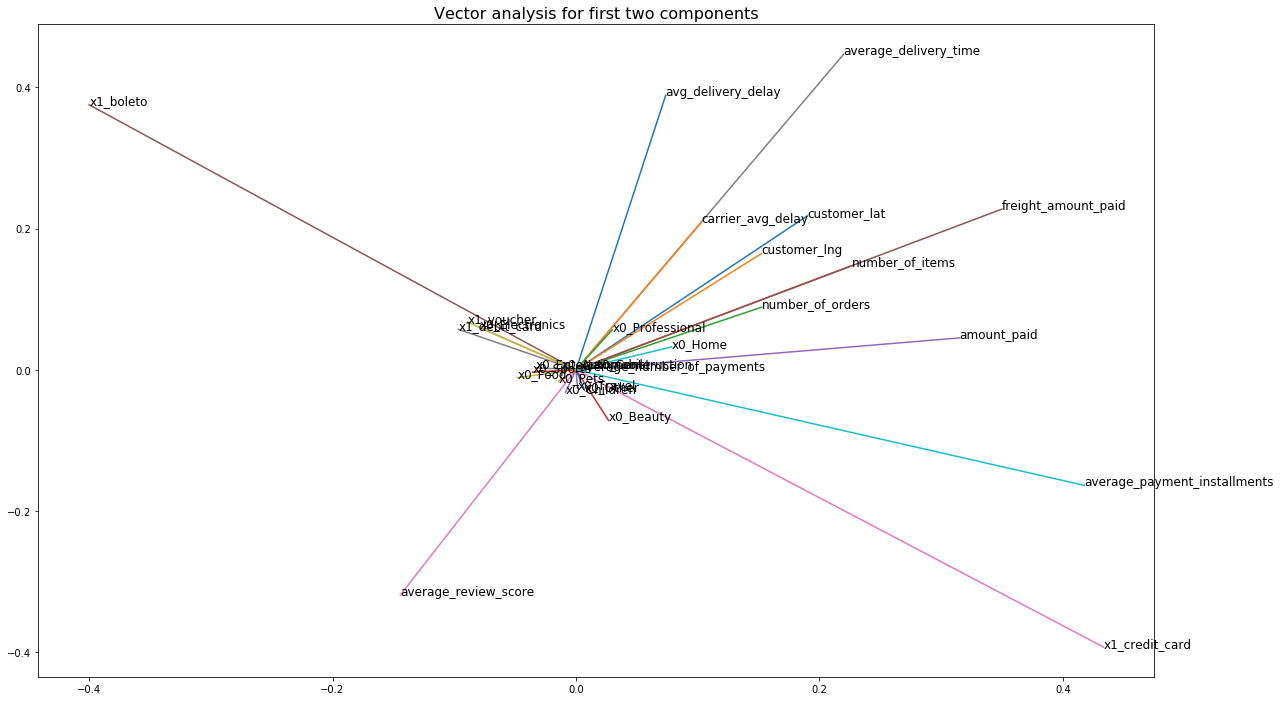

In [44]:
# Visualize vector for two first PCs

pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    # Display a line from the origin to the component point
    plt.plot([0, x], [0, y])
    # Add the name of the feature
    plt.text(x, y, X_scaled.columns[i], fontsize='12')
plt.title("Vector analysis for first two components", fontsize=16)
plt.show()

In [45]:
# Project X on the principal components
X_projected = pca.transform(X_scaled)

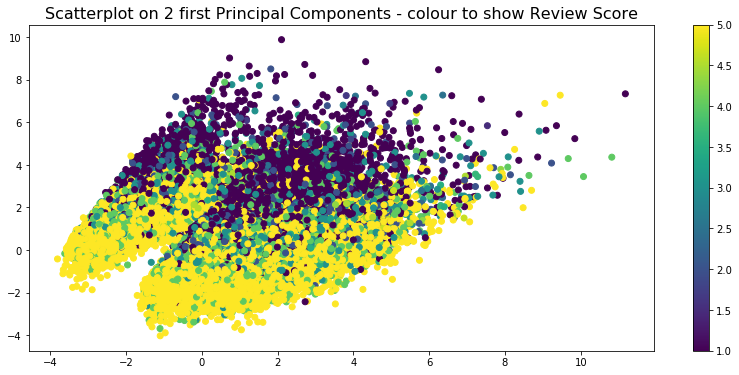

In [46]:
import numpy as np

# Display observations with colour
plt.scatter(X_projected[:, 0], X_projected[:, 1],
            c=current_df.get('average_review_score'))
plt.colorbar()
plt.title("Scatterplot on 2 first Principal Components - colour to show Review Score", fontsize=16)
plt.show()

### t-SNE

In [47]:
# Get a sample of the data for t-SNE and testing different algorithms
X_scaled_sample = X_scaled.sample(n=5000, random_state=42)

In [48]:
# Create a projection of the sample data
X_sample_projected = pca.transform(X_scaled_sample)

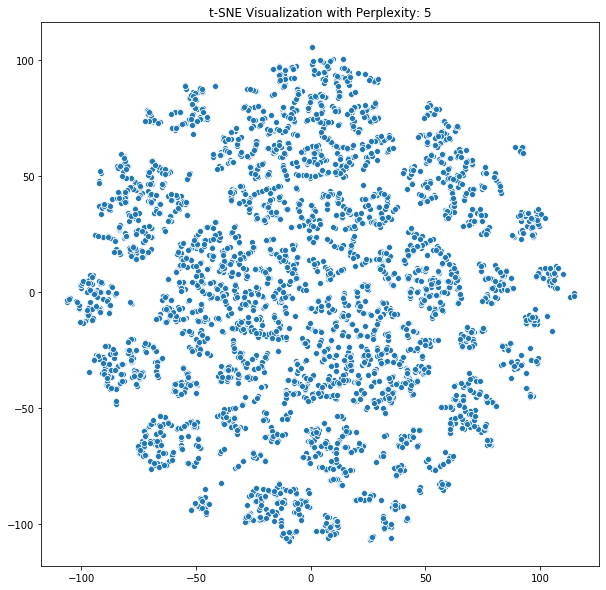

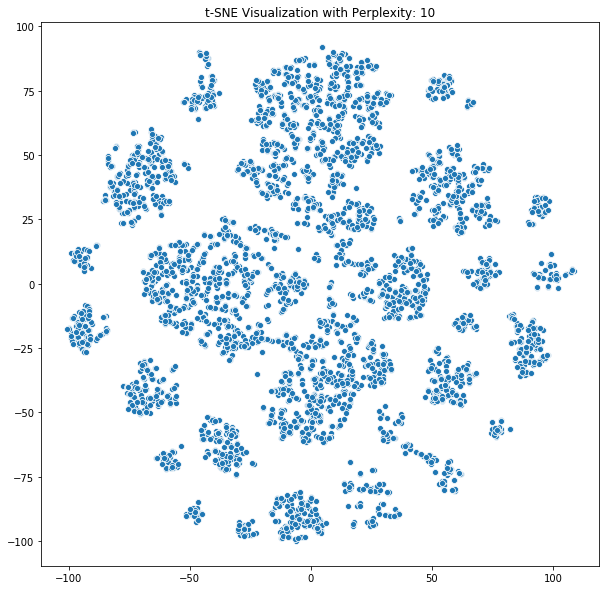

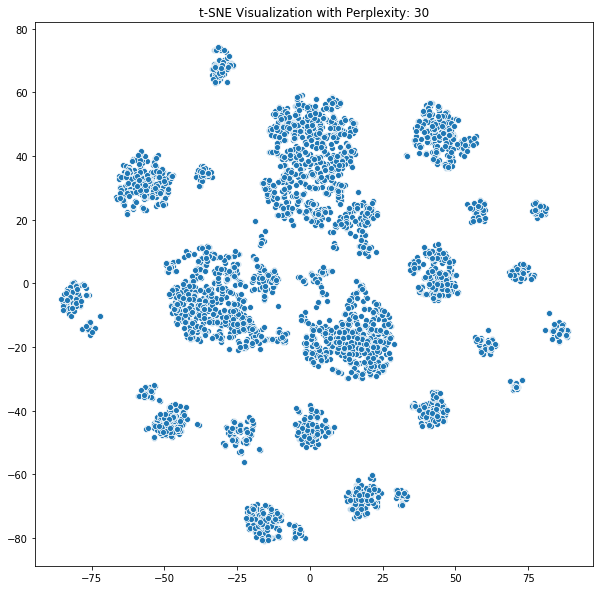

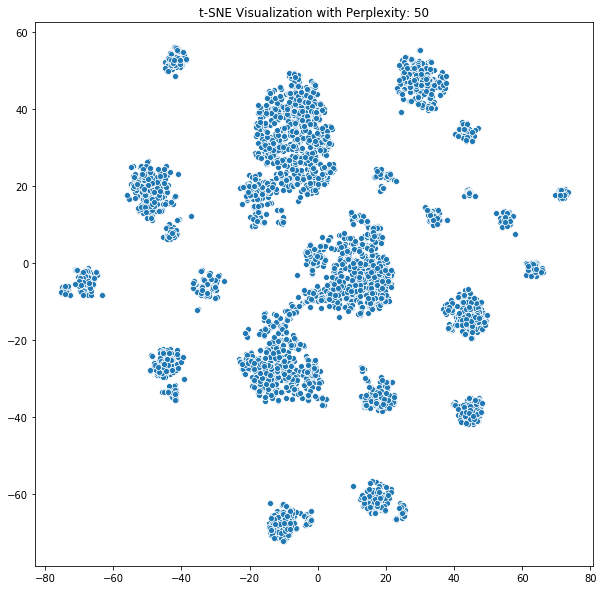

In [18]:
# Inspiration from here: https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

# Visualize t-SNE with different levels of perplexity
from sklearn.manifold import TSNE

perplex_list = [5, 10, 30, 50]
for i in perplex_list:
    # Run t-SNE
    tsne = TSNE(n_components=2, perplexity=i, random_state=42)
    T = tsne.fit_transform(X_sample_projected)

    # Visualize
    plt.figure(figsize=(10, 10))
    plt.title(f't-SNE Visualization with Perplexity: {i}')
    sns.scatterplot(T[:, 0], T[:, 1])
    plt.show()

### Clustering

#### K-Means

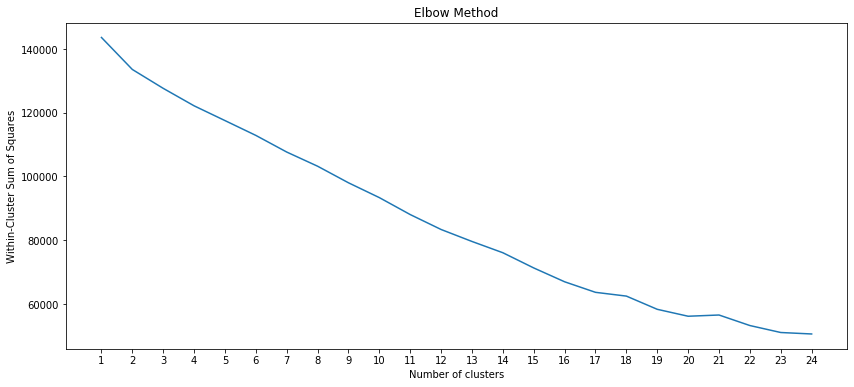

In [49]:
# Find optimal number of clusters
# Method obtained from: https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
from sklearn import cluster

wcss = []
for i in range(1, 25):
    kmeans = cluster.KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_sample_projected)
    # Sum of squared distances of samples to their closest cluster center.
    wcss.append(kmeans.inertia_)

# Show Intertia Graph
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xticks(range(1, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

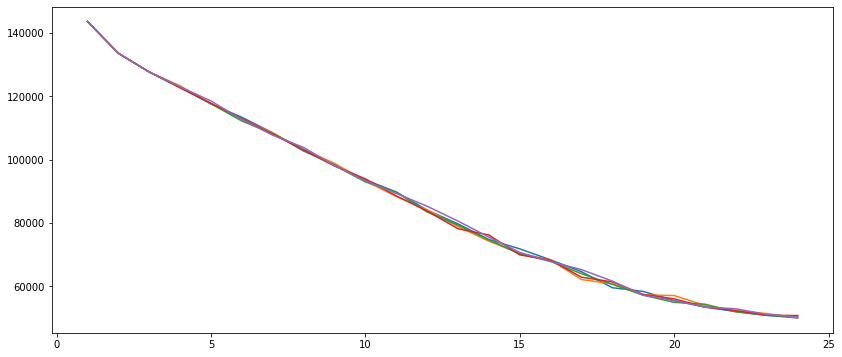

In [20]:
# Testing inertia stability over different clusters
loops = 5
for j in range(1, loops+1):
    wcss = []
    for i in range(1, 25):
        kmeans = cluster.KMeans(n_clusters=i)
        kmeans.fit(X_sample_projected)
        # Sum of squared distances of samples to their closest cluster center.
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 25), wcss)
plt.show()

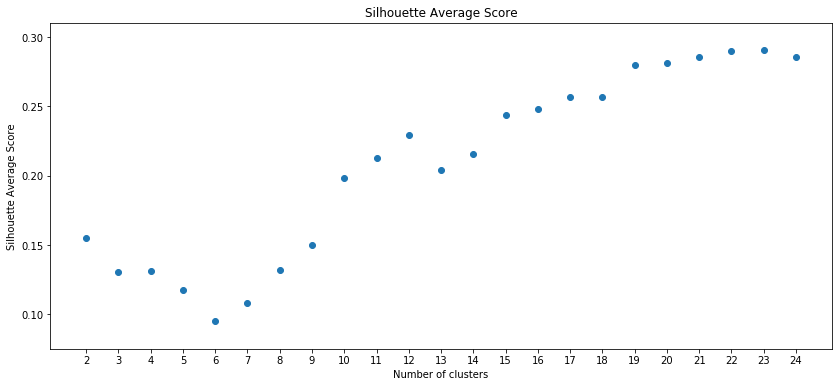

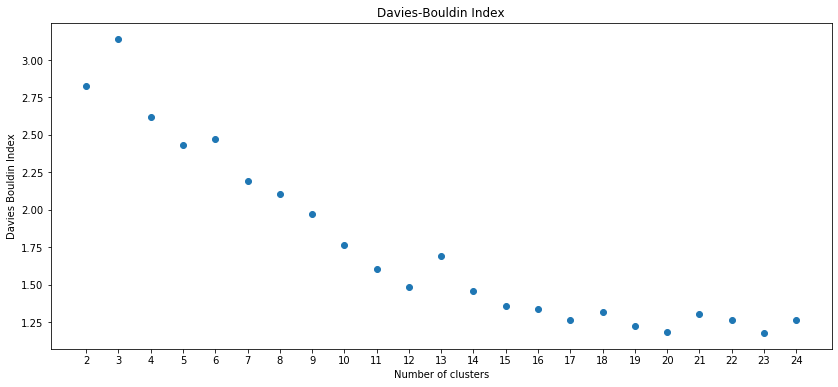

In [50]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

silhouette_avg = []
davies_bouldin = []
for i in range(2, 25):
    clusterer = cluster.KMeans(n_clusters=i, random_state=42)
    cluster_labels = clusterer.fit_predict(X_sample_projected)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg.append(silhouette_score(X_sample_projected, cluster_labels))

    # clusters which are farther apart and less dispersed will result in a better score (closer to 0)
    davies_bouldin.append(davies_bouldin_score(
        X_sample_projected, cluster_labels))

# Show Silhouette Graph
plt.scatter(range(2, 25), silhouette_avg)
plt.title('Silhouette Average Score')
plt.xticks(range(2, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Average Score')
plt.show()

# Show Davies Bouldin Graph
plt.scatter(range(2, 25), davies_bouldin)
plt.title('Davies-Bouldin Index')
plt.xticks(range(2, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Index')
plt.show()

<b>Conclusion:</b> Best number of clusters seems to be 20

In [22]:
# Create cluster with identified best number of clusters
n_clusters = 20
clust = cluster.KMeans(n_clusters=n_clusters, random_state=42)
clust.fit(X_sample_projected)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

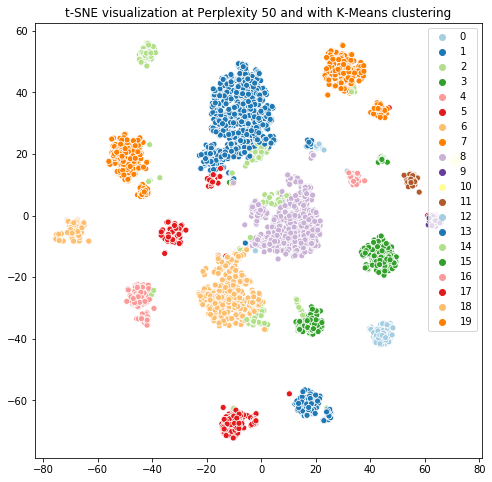

In [23]:
# Visualize fitted data on t-SNE visualization
plt.figure(figsize=(8, 8))
plt.title('t-SNE visualization at Perplexity 50 and with K-Means clustering')
sns.scatterplot(T[:, 0], T[:, 1], hue=clust.labels_, legend='full',
                palette=sns.color_palette("Paired", n_clusters))
plt.show()

In [24]:
# Generate Silhouette and Davies Bouldin scores for this number of clusters
cluster_labels = clust.fit_predict(X_sample_projected)
print(
    f'Silhouette Score: {silhouette_score(X_sample_projected, cluster_labels)}')
print(
    f'Davies Bouldin Index: {davies_bouldin_score(X_sample_projected, cluster_labels)}')

Silhouette Score: 0.28123860699779124
Davies Bouldin Index: 1.1811218370093775


#### Hierarchical Clustering

In [25]:
from sklearn.cluster import AgglomerativeClustering

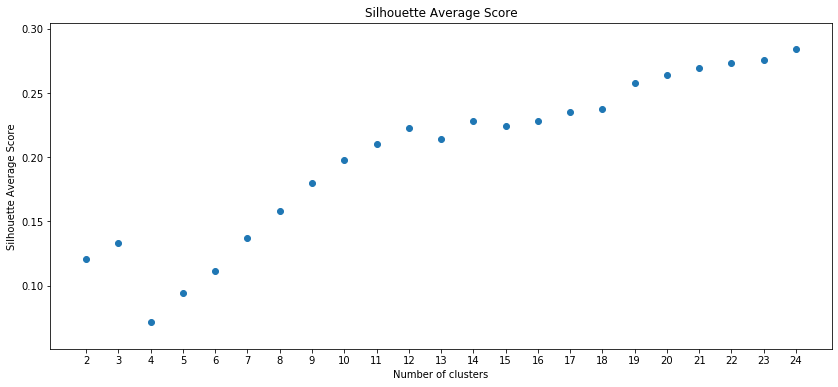

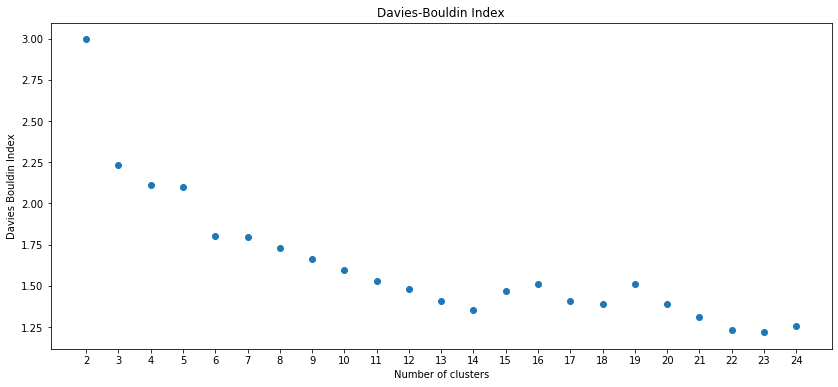

In [26]:
silhouette_avg = []
davies_bouldin = []
for i in range(2, 25):
    clusterer = cluster.AgglomerativeClustering(n_clusters=i)
    cluster_labels = clusterer.fit_predict(X_sample_projected)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg.append(silhouette_score(X_sample_projected, cluster_labels))

    # clusters which are farther apart and less dispersed will result in a better score (closer to 0)
    davies_bouldin.append(davies_bouldin_score(
        X_sample_projected, cluster_labels))

# Show Silhouette Graph
plt.scatter(range(2, 25), silhouette_avg)
plt.title('Silhouette Average Score')
plt.xticks(range(2, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Average Score')
plt.show()

# Show Davies Bouldin Graph
plt.scatter(range(2, 25), davies_bouldin)
plt.title('Davies-Bouldin Index')
plt.xticks(range(2, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Index')
plt.show()

<b>Conclusion:</b> 14 clusters seems to be a good amount

In [27]:
# Run model with best number of clusetser
n_clusters = 20
clust = cluster.AgglomerativeClustering(n_clusters=n_clusters)
clust.fit(X_sample_projected)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=20)

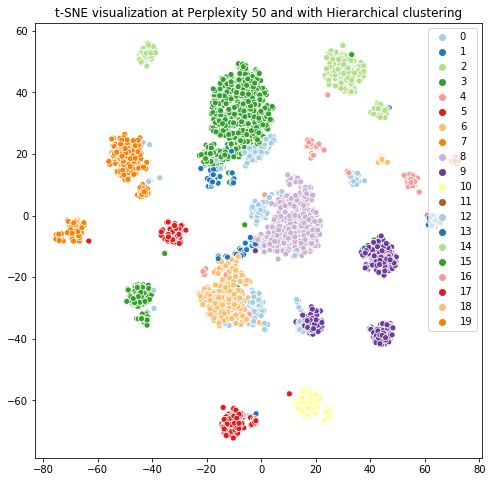

In [28]:
# Visualize fitted data on t-SNE visualization
plt.figure(figsize=(8, 8))
plt.title('t-SNE visualization at Perplexity 50 and with Hierarchical clustering')
sns.scatterplot(T[:, 0], T[:, 1], hue=clust.labels_, legend='full',
                palette=sns.color_palette("Paired", n_clusters))
plt.show()

In [29]:
# Generate Silhouette and Davies Bouldin scores for this algorithm
cluster_labels = clust.fit_predict(X_sample_projected)
print(
    f'Silhouette Score: {silhouette_score(X_sample_projected, cluster_labels)}')
print(
    f'Davies Bouldin Index: {davies_bouldin_score(X_sample_projected, cluster_labels)}')

Silhouette Score: 0.2643485861217863
Davies Bouldin Index: 1.3905625775065253


#### DBSCAN

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

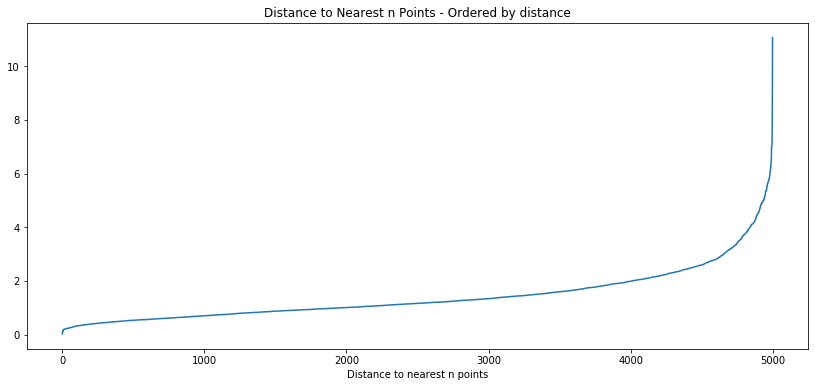

In [31]:
# Finding optimal parameters
# Methodology based on following article: https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_sample_projected)
distances, indices = nbrs.kneighbors(X_sample_projected)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.xlabel("Distance to nearest n points")
plt.title("Distance to Nearest n Points - Ordered by distance")
plt.show()

In [32]:
# Per above graph, critical change in curvature occuring around the point where eps = 4
clust = cluster.DBSCAN(eps=4)
clust.fit(X_sample_projected)

DBSCAN(algorithm='auto', eps=4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

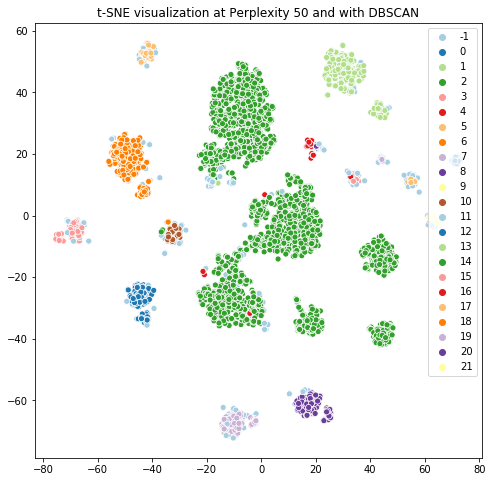

In [33]:
# Visualize clusters on t-SNE visualization
plt.figure(figsize=(8, 8))
plt.title('t-SNE visualization at Perplexity 50 and with DBSCAN')
sns.scatterplot(T[:, 0], T[:, 1], hue=clust.labels_, legend='full',
                palette=sns.color_palette("Paired", len(set(clust.labels_.tolist()))))
plt.show()

In [34]:
# Generate Silhouette and Davies Boouldin scores
cluster_labels = clust.fit_predict(X_sample_projected)
print(
    f'Silhouette Score: {silhouette_score(X_sample_projected, cluster_labels)}')
print(
    f'Davies Bouldin Index: {davies_bouldin_score(X_sample_projected, cluster_labels)}')

Silhouette Score: 0.22066384531936128
Davies Bouldin Index: 1.8794997317496505


<b>Conclusion:</b> The K-Means model gave us the best results in terms of Silhouette and Davies Bouldin and visually allowed for a better separation of the central clusters. As such, we will use this model going forward with the full dataset.

## Applying to 2-dimension PCA

In [35]:
# Create cluster with identified best number of clusters
n_clusters = 20
clust = cluster.KMeans(n_clusters=n_clusters, random_state=42)
clust.fit(X_projected)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

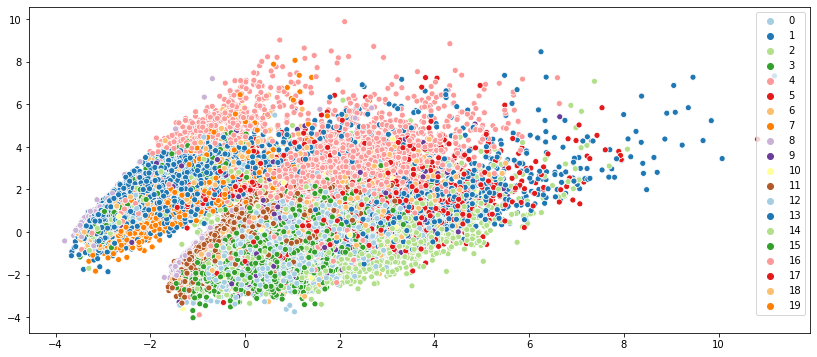

In [36]:
# Visualize identified clusters from K-Means algorithm on 2-PCA visualization
sns.scatterplot(x=X_projected[:, 0],
                y=X_projected[:, 1],
                hue=clust.labels_,
                legend='full',
                palette=sns.color_palette("Paired", n_clusters)
                )

## Entire Dataset

In [51]:
current_df

,customer_lat,customer_lng,number_of_orders,number_of_items,amount_paid,freight_amount_paid,average_review_score,average_delivery_time,average_number_of_payments,average_payment_installments,avg_delivery_delay,carrier_avg_delay,x0_Automobile,x0_Beauty,x0_Children,x0_Construction,x0_Electronics,x0_Entertainment,x0_Food,x0_Home,x0_Other,x0_Pets,x0_Professional,x0_Sports,x0_Travel,x1_boleto,x1_credit_card,x1_debit_card,x1_voucher
0,-23.337679,-46.826739,1,1,129.90,12.00,5.0,6.0,1.0,8.0,-5.0,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-23.557876,-46.788754,1,1,18.90,8.29,4.0,2.0,1.0,1.0,-5.0,-3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-27.543787,-48.631973,1,1,69.00,17.22,3.0,25.0,1.0,8.0,-2.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.307764,-48.482884,1,1,25.99,17.63,4.0,20.0,1.0,4.0,-12.0,-6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-23.506140,-47.470475,1,1,180.00,16.89,5.0,13.0,1.0,6.0,-8.0,-7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89197,-28.936060,-51.549804,1,1,58.00,15.16,5.0,7.0,1.0,1.0,-23.0,-7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
89198,-12.216776,-38.959754,1,1,64.89,19.69,4.0,30.0,1.0,1.0,-3.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
89199,-11.835954,-55.508033,1,1,89.90,22.56,5.0,14.0,1.0,1.0,-30.0,-4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
89200,-21.126308,-41.674411,1,1,115.00,18.69,5.0,11.0,1.0,5.0,-14.0,-5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### K-Means

We saw earlier that the optimal number of clusters seemed to be around 20 but with good values between 15 and 22. Let's run the graphs again on the whole dataset with a focus on these numbers of clusters and see if the results are similar.

In [52]:
# Find optimal number of clusters
# Method obtained from: https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
from sklearn import cluster

wcss = []
for i in range(15, 23):
    kmeans = cluster.KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_projected)
    # Sum of squared distances of samples to their closest cluster center.
    wcss.append(kmeans.inertia_)

# Show Inertia Graph
plt.plot(range(15, 23), wcss)
plt.title('Elbow Method')
plt.xticks(range(15, 23))
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

KeyboardInterrupt: 

There is an elbow at 16 clusters and another at 20 clusters. Let's see whether this is also confirmed with the Silhouette and Davies Bouldin scores.

In [39]:
# Create cluster with identified best number of clusters
for i in range(16, 21):
    clust = cluster.KMeans(n_clusters=i, random_state=42)
    clust.fit(X_projected)
    print(
        f'Silhouette Score, {i} clusters: {silhouette_score(X_projected, clust.labels_)}')
    print(
        f'Davies Bouldin Index, {i} clusters: {davies_bouldin_score(X_projected, clust.labels_)}')

Silhouette Score, 16 clusters: 0.23278443350544348
Davies Bouldin Index, 16 clusters: 1.3153113332602753
Silhouette Score, 17 clusters: 0.25428820256833223
Davies Bouldin Index, 17 clusters: 1.3634134264205957
Silhouette Score, 18 clusters: 0.27092817214070936
Davies Bouldin Index, 18 clusters: 1.2965066465704413
Silhouette Score, 19 clusters: 0.26942799006377405
Davies Bouldin Index, 19 clusters: 1.2853613242444153
Silhouette Score, 20 clusters: 0.28101655188813984
Davies Bouldin Index, 20 clusters: 1.1757153071947672


In [40]:
# Testing stability of scores with 3 consecutive runs with different initializations
for i in range(1, 4):
    clust = cluster.KMeans(n_clusters=20, init = 'k-means++', n_init = 10)  # Random state removed for this test
    clust.fit(X_projected)
    print(
        f'Silhouette Score, loop {i} clusters: {silhouette_score(X_projected, clust.labels_)}')
    print(
        f'Davies Bouldin Index, loop {i} clusters: {davies_bouldin_score(X_projected, clust.labels_)}')

Silhouette Score, loop 1 clusters: 0.27355660020187156
Davies Bouldin Index, loop 1 clusters: 1.277916478997198
Silhouette Score, loop 2 clusters: 0.28671646588294786
Davies Bouldin Index, loop 2 clusters: 1.2940035818950153
Silhouette Score, loop 3 clusters: 0.2769742194699968
Davies Bouldin Index, loop 3 clusters: 1.25797409717118


<b>Conclusion:</b> Just like in our analysis on the data sample, 20 clusters seems to provide the best performance. <br>
We also see that the performance with 20 clusters does not change a lot and generally remains very close or superior to other numbers of clusters <br>
From this, we can say that our clusters are stable.

In [53]:
# Run K-Means with 20 clusters
clust = cluster.KMeans(n_clusters=20, random_state=42)
clust.fit(X_projected)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [54]:
clust.labels_

array([ 0,  3, 18, ...,  4,  3,  3], dtype=int32)

In [55]:
# Attach labels to dataset
current_df['labels'] = clust.labels_
current_df['labels'] = current_df['labels'].astype(str)

In [56]:
current_df

,customer_lat,customer_lng,number_of_orders,number_of_items,amount_paid,freight_amount_paid,average_review_score,average_delivery_time,average_number_of_payments,average_payment_installments,avg_delivery_delay,carrier_avg_delay,x0_Automobile,x0_Beauty,x0_Children,x0_Construction,x0_Electronics,x0_Entertainment,x0_Food,x0_Home,x0_Other,x0_Pets,x0_Professional,x0_Sports,x0_Travel,x1_boleto,x1_credit_card,x1_debit_card,x1_voucher,labels
0,-23.337679,-46.826739,1,1,129.90,12.00,5.0,6.0,1.0,8.0,-5.0,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,-23.557876,-46.788754,1,1,18.90,8.29,4.0,2.0,1.0,1.0,-5.0,-3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
2,-27.543787,-48.631973,1,1,69.00,17.22,3.0,25.0,1.0,8.0,-2.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,18
3,-1.307764,-48.482884,1,1,25.99,17.63,4.0,20.0,1.0,4.0,-12.0,-6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11
4,-23.506140,-47.470475,1,1,180.00,16.89,5.0,13.0,1.0,6.0,-8.0,-7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89197,-28.936060,-51.549804,1,1,58.00,15.16,5.0,7.0,1.0,1.0,-23.0,-7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
89198,-12.216776,-38.959754,1,1,64.89,19.69,4.0,30.0,1.0,1.0,-3.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
89199,-11.835954,-55.508033,1,1,89.90,22.56,5.0,14.0,1.0,1.0,-30.0,-4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
89200,-21.126308,-41.674411,1,1,115.00,18.69,5.0,11.0,1.0,5.0,-14.0,-5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3


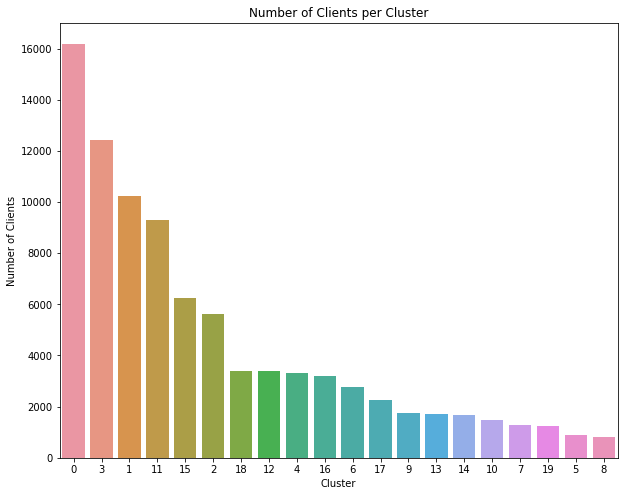

In [45]:
# Plot number of clients included in each clusters
plt.figure(figsize=(10, 8))
sns.countplot(data=current_df,
              x='labels',
              order=current_df['labels'].value_counts().index)
plt.xlabel('Cluster')
plt.ylabel('Number of Clients')
plt.title('Number of Clients per Cluster')
plt.show()

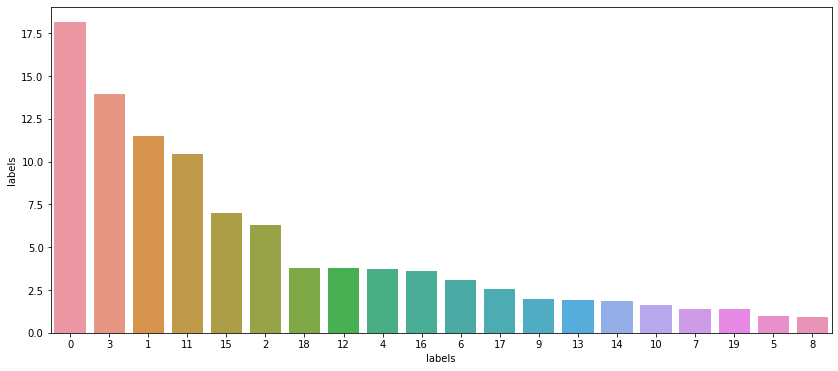

In [46]:
# Visualize clusters sizes as a percentage of the total
sns.barplot(x="labels",
            y="labels",
            data=current_df,
            estimator=lambda x: len(x) / len(df) * 100,
            order=current_df['labels'].value_counts().index)

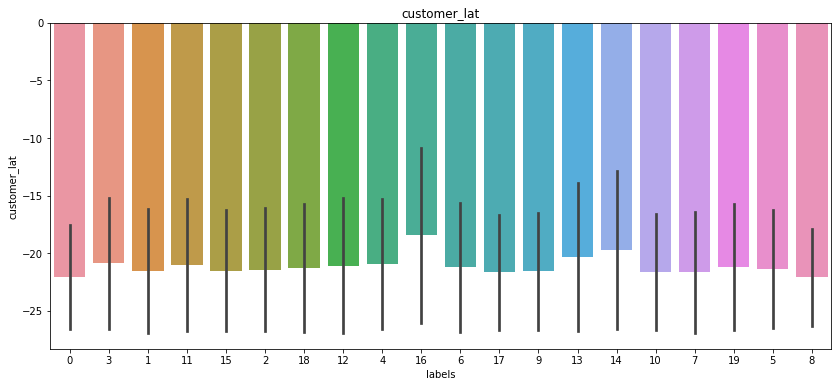

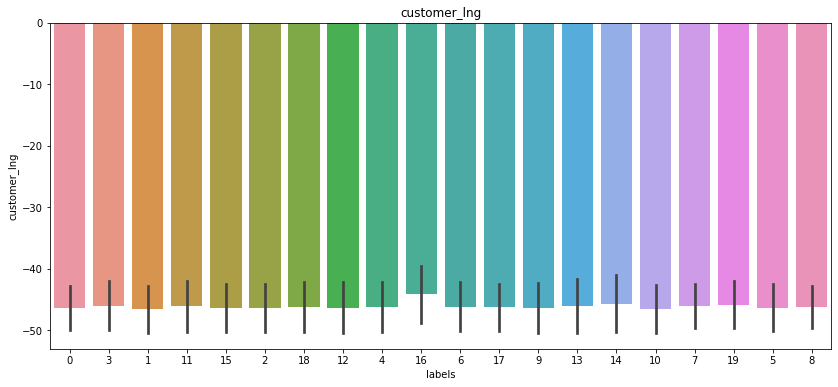

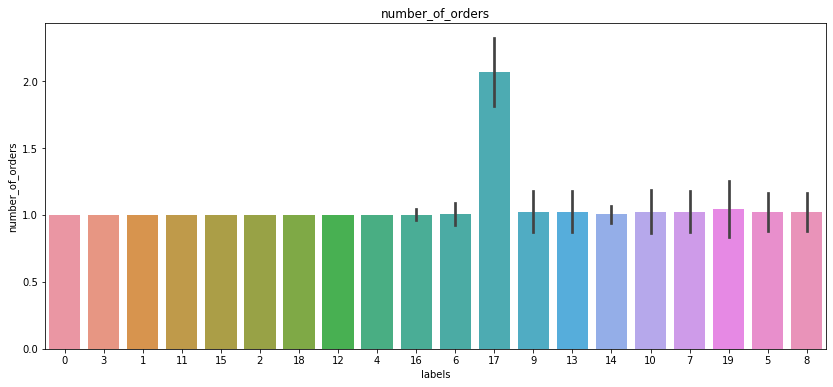

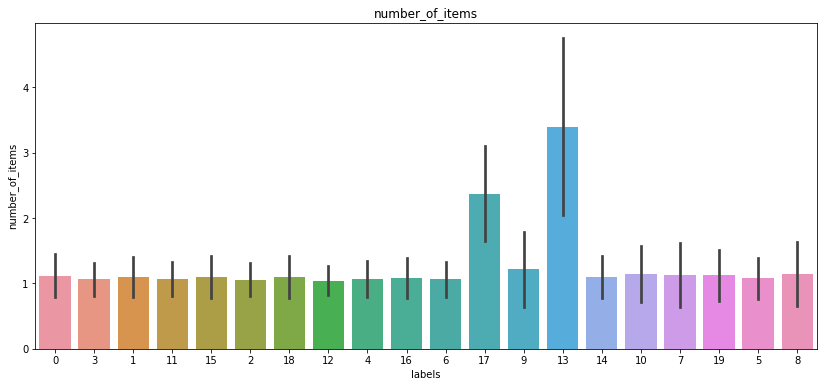

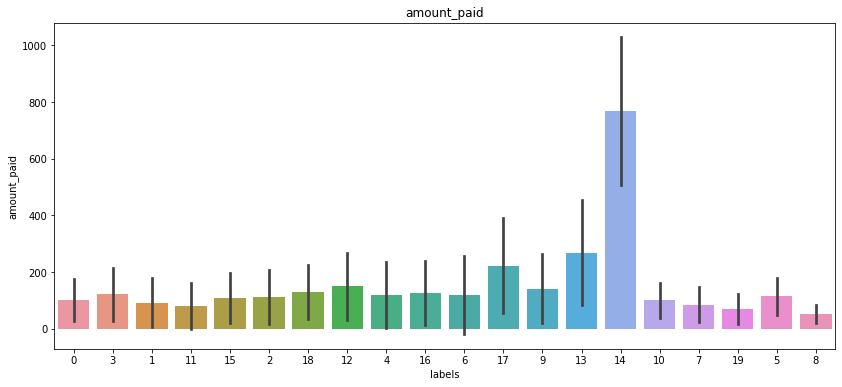

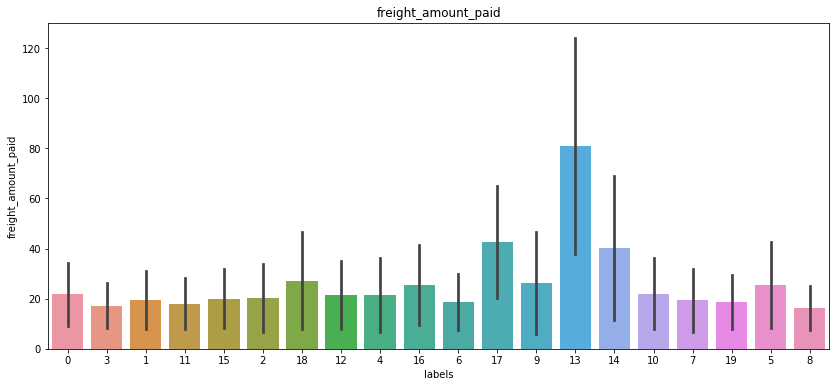

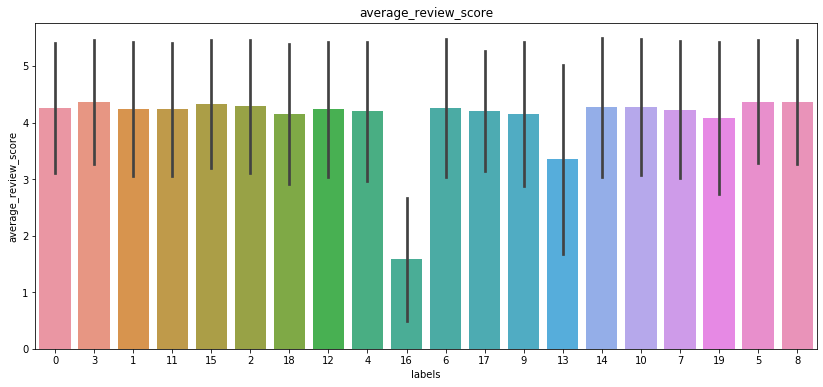

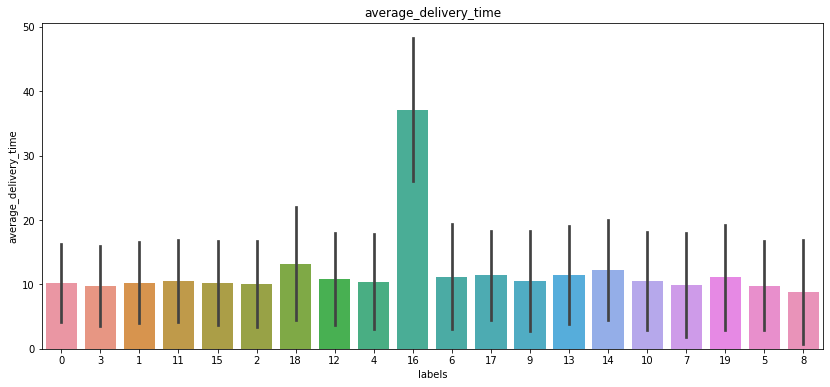

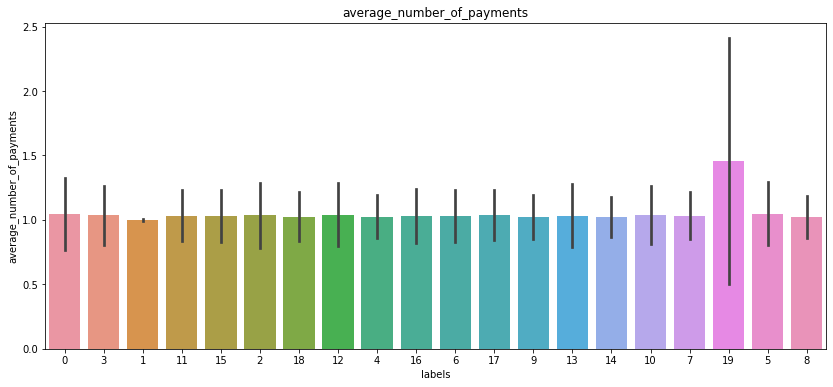

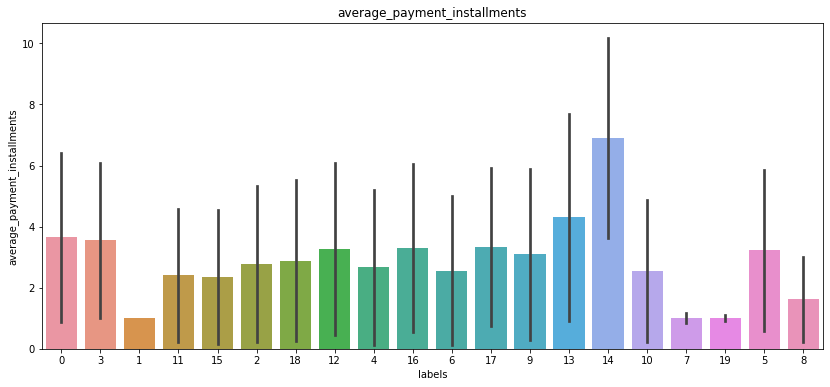

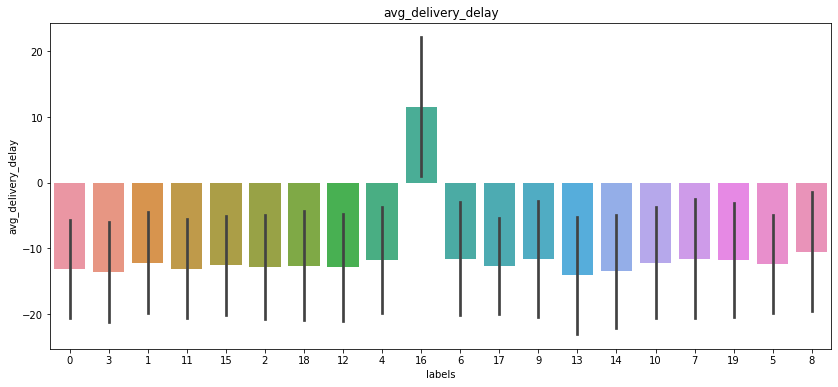

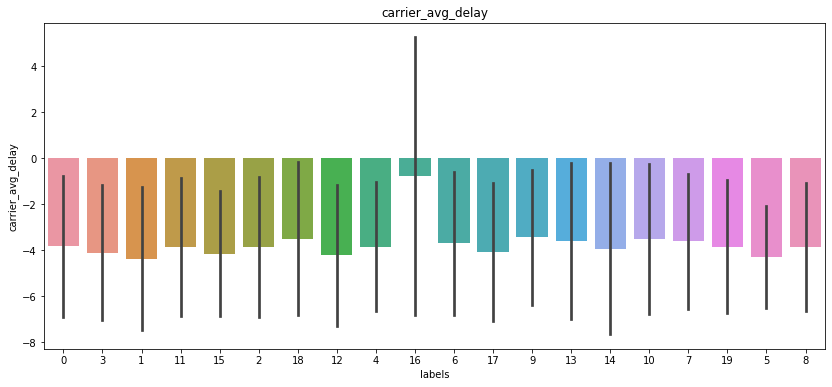

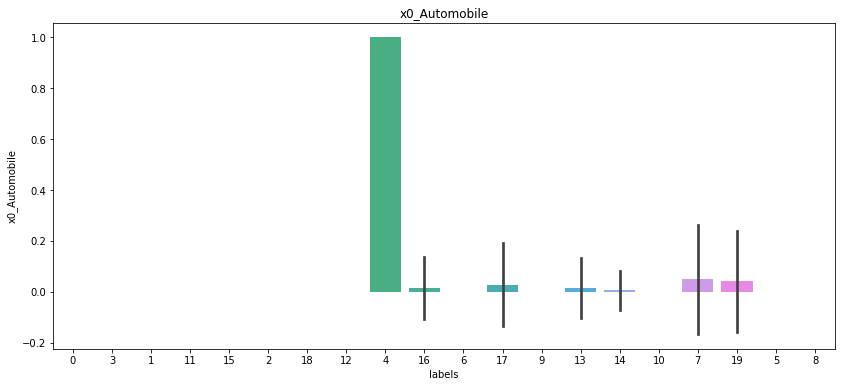

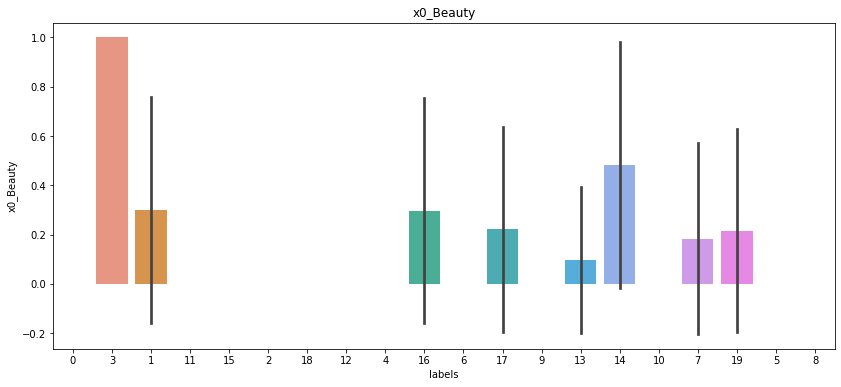

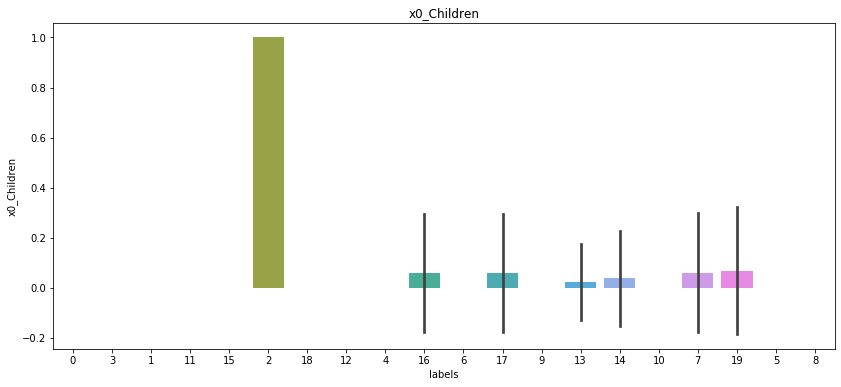

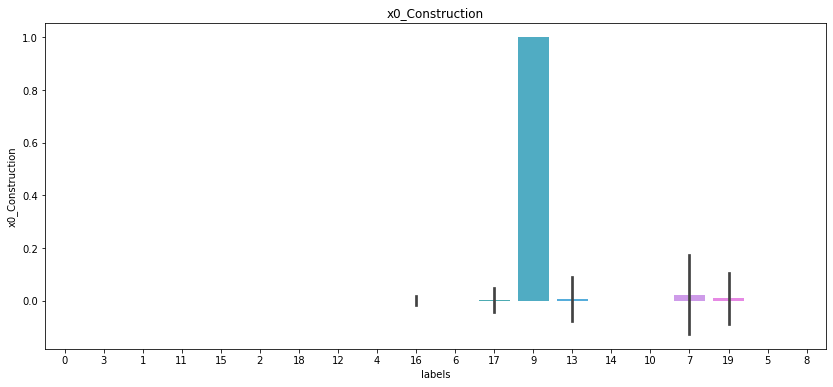

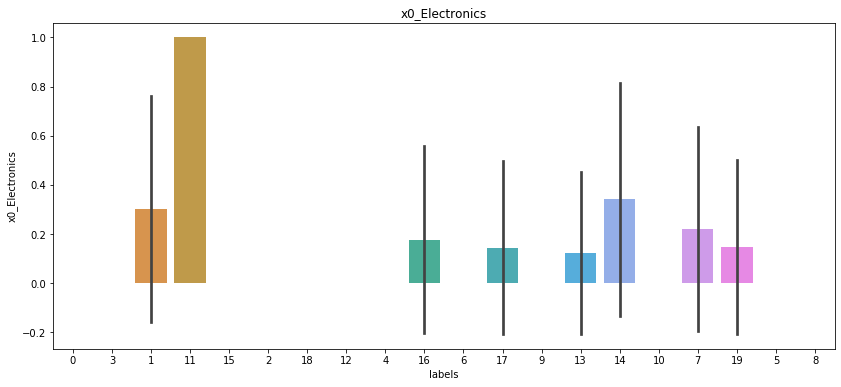

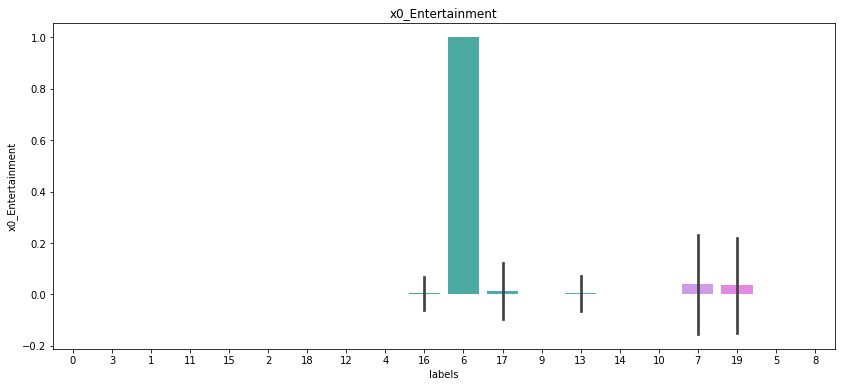

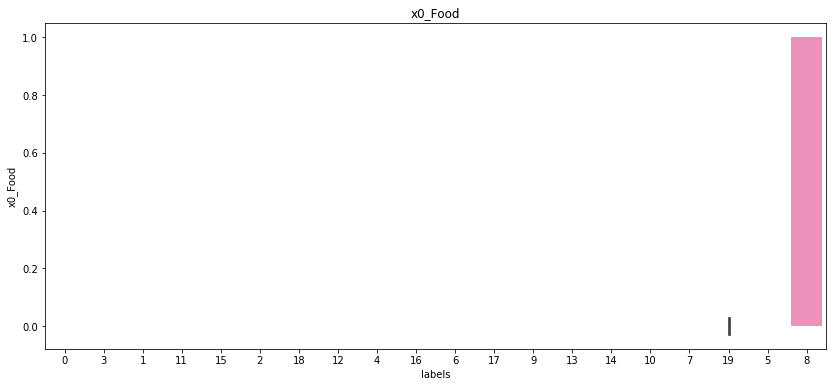

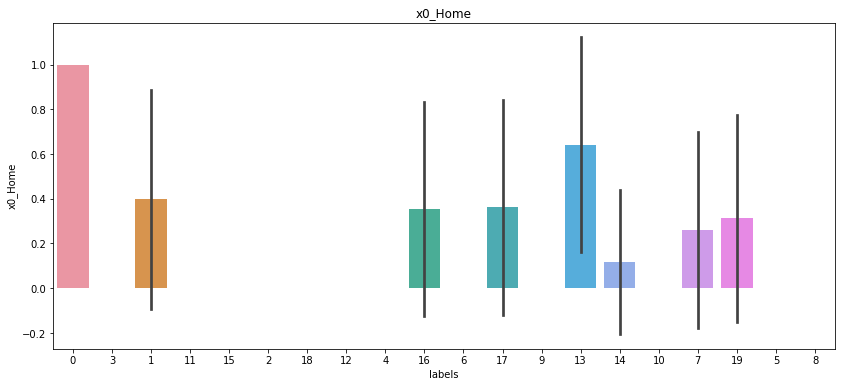

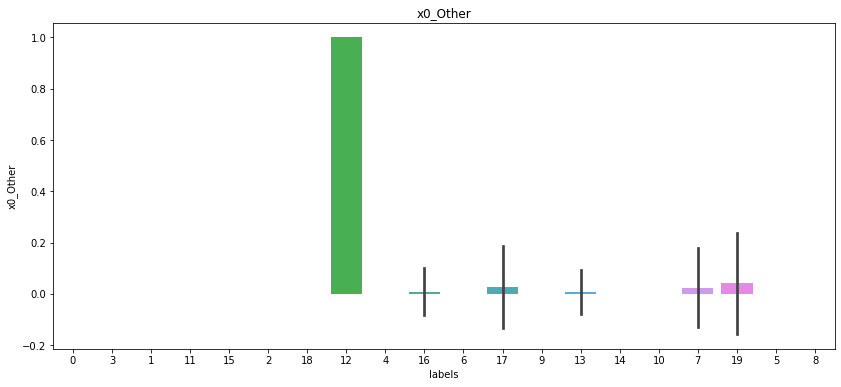

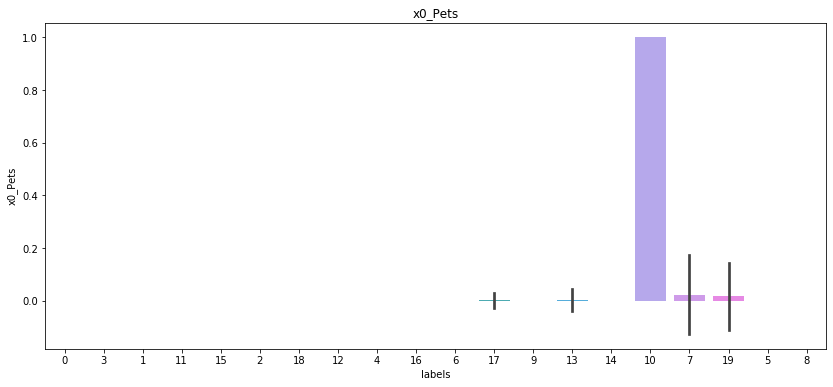

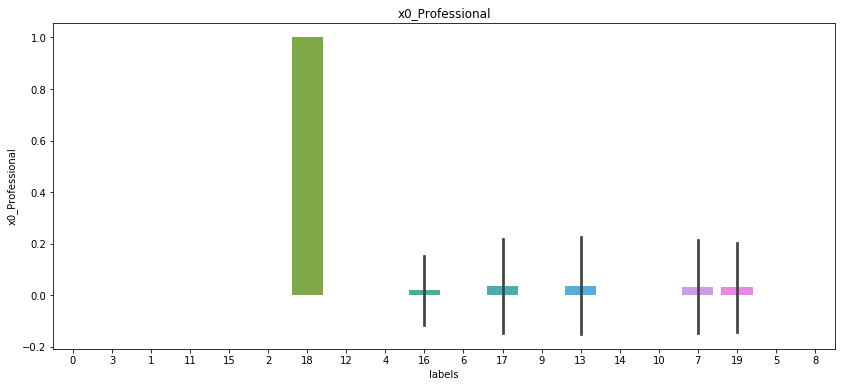

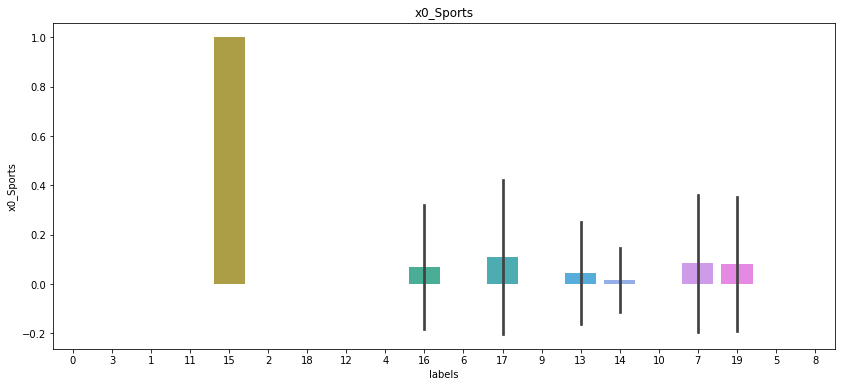

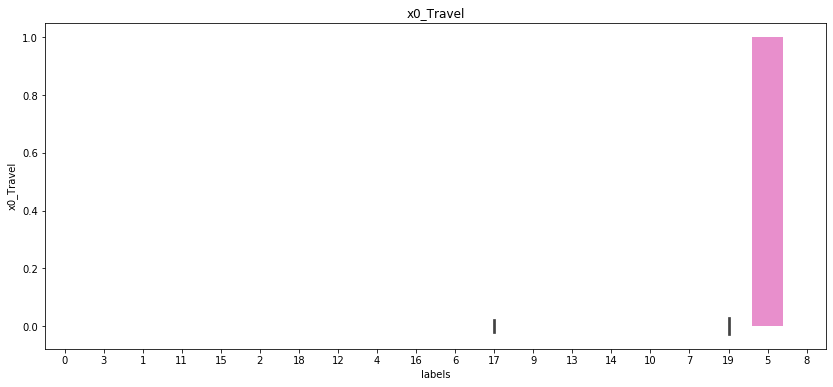

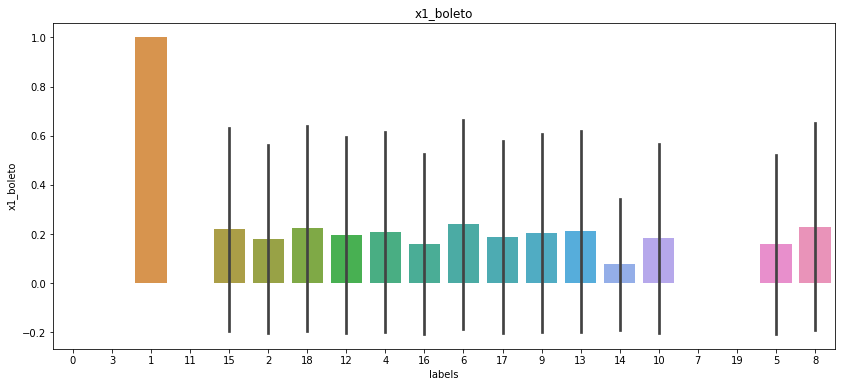

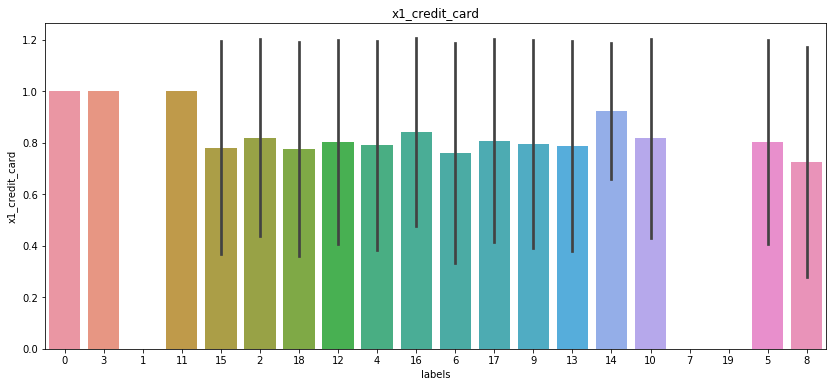

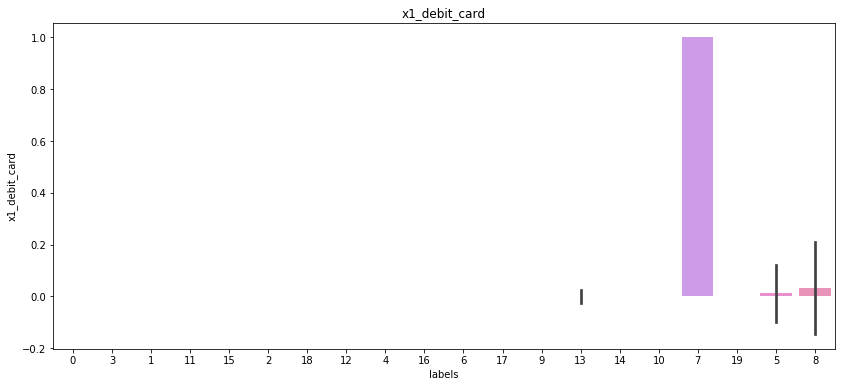

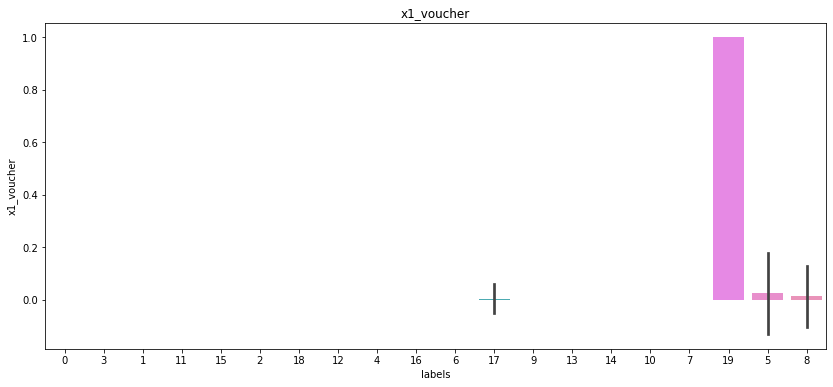

In [47]:
# Check average values and standard deviation for each cluster and each numerical column
df_numeric = current_df.select_dtypes([int, float])

for col in df_numeric.columns:
    sns.barplot(data=current_df,
                x='labels',
                y=col,
                ci='sd',
                order=current_df['labels'].value_counts().index)
    plt.title(col)
    plt.show()

### Cluster Interpretation

In order of cluster size
- Cluster 0 - 18%: Clients whose largest purchase category is "Home"
- Cluster 3 - 14%: Clients whose largest purchase category is "Beauty"
- Cluster 1 - 11%: Clients who pay in a single installment using payment type "Boleto"
- Cluster 11 - 10%: Clients whose largest purchase category is "Electronics"
- Cluster 15 - 7.5%: Clients whose largest purchase category is "Sports"
- Cluster 2 - 7%: Clients whose largest purchase category is "Children"
- Cluster 18 - 4%: Clients whose largest purchase category is "Professional"
- Cluster 12 - 4%: Clients whose largest purchase category is "Other"
- Cluster 4 - 4%: Clients whose largest purchase category is "Automobile"
- Cluster 16 - 4%: Clients who give low review scores due to delayed deliveries and tend to live further up north in the country.
- Cluster 6 - 3%: Clients whose largest purchase category is "Entertainment"
- Cluster 17 - 2.6%: Returning customers, these are clients who have ordered more than once from Olist
- Cluster 9 - 2%: Clients whose largest purchase category is "Construction"
- Cluster 13 - 2%: Clients who purchase a larger number of items and whose amount of freight paid is higher than normal, they also tend to have lower review scores
- Cluster 14 - 2%: Clients who pay larger amounts and typically pay in more installments
- Cluster 10 - 1.6%: Clients whose largest purchase category is "Pets"
- Cluster 7 - 1.4%: Clients who pay by debit card, they tend to pay lower amounts and mostly pay in a single installment
- Cluster 19 - 1.4%: Clients who pay with vouchers, they tend to make a higher number of payments (implying they are using multiple vouchers) and typically make purchases of smaller amounts
- Cluster 5 - 1%: Clients whose largest purchase category is "Travel"
- Cluster 8 - 1%: Clients whose largest purchase category is "Food"

### Cluster silhouette scores

In [48]:
# Method inspired by this link: https://stackoverflow.com/questions/59919627/how-to-calculate-the-silhouette-score-for-each-cluster-separately-in-python

from sklearn.metrics import silhouette_samples

# Getting the silhouette score for each sample
sample_silhouette_values = silhouette_samples(X_projected, clust.labels_)

num_clusters = len(np.unique(clust.labels_))
means_lst = []
for label in range(num_clusters):
    print(f'Cluster {label}')
    # Getting the mean silhouette value per cluster
    sil_score = sample_silhouette_values[clust.labels_ == label].mean()
    means_lst.append(sil_score)
    print(f'Silhouette score: {sil_score}')

Cluster 0
Silhouette score: 0.2866905137180177
Cluster 1
Silhouette score: 0.14881720653998332
Cluster 2
Silhouette score: 0.31035713251201275
Cluster 3
Silhouette score: 0.2948919230870776
Cluster 4
Silhouette score: 0.3790829180340433
Cluster 5
Silhouette score: 0.5931665198656465
Cluster 6
Silhouette score: 0.3928699920869073
Cluster 7
Silhouette score: 0.3831227562914343
Cluster 8
Silhouette score: 0.6199297656213119
Cluster 9
Silhouette score: 0.4463603716988716
Cluster 10
Silhouette score: 0.5229088702205313
Cluster 11
Silhouette score: 0.32015177336194045
Cluster 12
Silhouette score: 0.36673892081835774
Cluster 13
Silhouette score: -0.018916210257578506
Cluster 14
Silhouette score: 0.05755286597484221
Cluster 15
Silhouette score: 0.3035151019529616
Cluster 16
Silhouette score: 0.009497035479896348
Cluster 17
Silhouette score: 0.15865784090720772
Cluster 18
Silhouette score: 0.34192291312275347
Cluster 19
Silhouette score: 0.2856755248940958


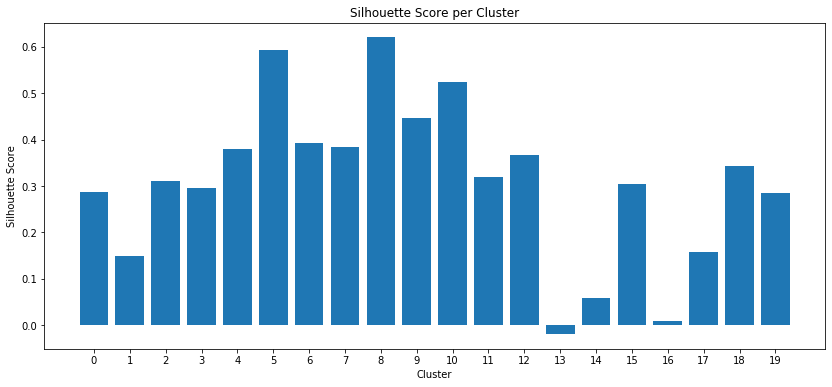

In [49]:
# Plotting the silhouette score per cluster
plt.bar(np.unique(clust.labels_), means_lst)
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.xticks(np.unique(clust.labels_))
plt.title('Silhouette Score per Cluster')
plt.show()

#### Testing stability

In [19]:
# Re-attach order dates to customers
# Get dates from original data
df_dates = pd.read_csv(f'project_cluster_input.csv')
df_dates = df_dates['last_purchase_date']
# Re-attach dates to Scaled dataset
df_full = pd.merge(X_scaled, df_dates, left_index=True, right_index=True)

In [20]:
# Convert date to date time format
df_full['last_purchase_date'] = pd.to_datetime(df_full['last_purchase_date'])

In [23]:
df_full

,customer_lat,customer_lng,number_of_orders,number_of_items,amount_paid,freight_amount_paid,average_review_score,average_delivery_time,average_number_of_payments,average_payment_installments,avg_delivery_delay,carrier_avg_delay,x0_Automobile,x0_Beauty,x0_Children,x0_Construction,x0_Electronics,x0_Entertainment,x0_Food,x0_Home,x0_Other,x0_Pets,x0_Professional,x0_Sports,x0_Travel,x1_boleto,x1_credit_card,x1_debit_card,x1_voucher,last_purchase_date
0,-0.378395,-0.166693,-0.167213,-0.312344,0.029686,-0.598665,0.663401,-0.634051,-0.150698,1.966740,0.753727,-0.049844,-0.203883,-0.510656,-0.273568,-0.144157,-0.440936,-0.183866,-0.095249,1.636731,-0.203913,-0.131399,-0.207083,-0.292809,-0.100503,-0.498837,0.544123,-0.121658,-0.121706,2018-05-10 10:56:27
1,-0.418373,-0.157096,-0.167213,-0.312344,-0.766251,-0.810733,-0.116105,-1.100798,-0.150698,-0.715889,0.753727,0.257930,-0.203883,1.958264,-0.273568,-0.144157,-0.440936,-0.183866,-0.095249,-0.610974,-0.203913,-0.131399,-0.207083,-0.292809,-0.100503,-0.498837,0.544123,-0.121658,-0.121706,2018-05-07 11:11:27
2,-1.142033,-0.622763,-0.167213,-0.312344,-0.407003,-0.300284,-0.895611,1.582996,-0.150698,1.966740,1.080672,0.257930,-0.203883,-0.510656,-0.273568,-0.144157,-0.440936,-0.183866,-0.095249,-0.610974,-0.203913,-0.131399,4.828972,-0.292809,-0.100503,-0.498837,0.544123,-0.121658,-0.121706,2017-03-10 21:05:03
3,3.621237,-0.585098,-0.167213,-0.312344,-0.715411,-0.276847,-0.116105,0.999563,-0.150698,0.433809,-0.009145,-0.665393,-0.203883,-0.510656,-0.273568,-0.144157,2.267904,-0.183866,-0.095249,-0.610974,-0.203913,-0.131399,-0.207083,-0.292809,-0.100503,-0.498837,0.544123,-0.121658,-0.121706,2017-10-12 20:29:41
4,-0.408980,-0.329325,-0.167213,-0.312344,0.388933,-0.319147,0.663401,0.182756,-0.150698,1.200275,0.426782,-0.973167,-0.203883,-0.510656,-0.273568,-0.144157,2.267904,-0.183866,-0.095249,-0.610974,-0.203913,-0.131399,-0.207083,-0.292809,-0.100503,-0.498837,0.544123,-0.121658,-0.121706,2017-11-14 19:45:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89197,-1.394806,-1.359919,-0.167213,-0.312344,-0.485880,-0.418036,0.663401,-0.517365,-0.150698,-0.715889,-1.207944,-0.973167,-0.203883,1.958264,-0.273568,-0.144157,-0.440936,-0.183866,-0.095249,-0.610974,-0.203913,-0.131399,-0.207083,-0.292809,-0.100503,2.004664,-1.837820,-0.121658,-0.121706,2017-12-17 19:14:35
89198,1.640656,1.820807,-0.167213,-0.312344,-0.436475,-0.159096,-0.116105,2.166430,-0.150698,-0.715889,0.971690,3.027899,-0.203883,-0.510656,3.655399,-0.144157,-0.440936,-0.183866,-0.095249,-0.610974,-0.203913,-0.131399,-0.207083,-0.292809,-0.100503,-0.498837,0.544123,-0.121658,-0.121706,2017-12-10 20:07:56
89199,1.709796,-2.359918,-0.167213,-0.312344,-0.257138,0.004957,0.663401,0.299442,-0.150698,-0.715889,-1.970816,-0.049844,4.904767,-0.510656,-0.273568,-0.144157,-0.440936,-0.183866,-0.095249,-0.610974,-0.203913,-0.131399,-0.207083,-0.292809,-0.100503,-0.498837,0.544123,-0.121658,-0.121706,2017-02-07 15:49:16
89200,0.023090,1.134981,-0.167213,-0.312344,-0.077156,-0.216257,0.663401,-0.050618,-0.150698,0.817042,-0.227109,-0.357619,-0.203883,1.958264,-0.273568,-0.144157,-0.440936,-0.183866,-0.095249,-0.610974,-0.203913,-0.131399,-0.207083,-0.292809,-0.100503,-0.498837,0.544123,-0.121658,-0.121706,2018-05-02 15:17:41


In [31]:
df_old = df_full[df_full['last_purchase_date']
                < pd.Timestamp(y, 12-m, 1)].copy()
df_old.drop(columns=['last_purchase_date'], inplace=True)

df_old_projected = pca.transform(df_old)
clust_old = cluster.KMeans(
    n_clusters=20, random_state=42)  # Run algo
clust_old.fit(df_old_projected)  # Fit to projected older data

df_old['labels'] = clust_old.labels_  # Create labels columns
df_old['labels'] = df_old['labels'].astype(str)  # Convert type

print('Merging data')
# Merge data
df_merge = pd.merge(
    df_old['labels'], current_df, how='left', left_index=True, right_index=True)

print(f'Number of records: {len(df_merge)}')
# Append score
ari = adjusted_rand_score(
    df_merge['labels_x'], df_merge['labels_y'])
ari_scores.append(ari)
ami = adjusted_mutual_info_score(
    df_merge['labels_x'], df_merge['labels_y'])
ami_scores.append(ami)
print(f'Appending ARI score: {ari}')
print(f'Appending AMI score: {ami}')

Merging data
Number of records: 89202


KeyError: 'labels_x'

In [22]:
# Loop for different time frames
# Solution inspired by: https://stackoverflow.com/questions/55258457/find-mapping-that-translates-one-list-of-clusters-to-another-in-python
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

ari_scores = []
ami_scores = []
try:
    for y in [2018, 2017, 2016]:
        print(f'Year: {y}')
        for m in range(1, 12):
            print(f"Month -{m}")
            # Select data from before a particular date
            df_old = df_full[df_full['last_purchase_date']
                            < pd.Timestamp(y, 12-m, 1)].copy()
            df_old.drop(columns=['last_purchase_date'], inplace=True)

            # Run algo
            df_old_projected = pca.transform(df_old)
            clust_old = cluster.KMeans(
                n_clusters=20, random_state=42)  # Run algo
            clust_old.fit(df_old_projected)  # Fit to projected older data

            df_old['labels'] = clust_old.labels_  # Create labels columns
            df_old['labels'] = df_old['labels'].astype(str)  # Convert type

            print('Merging data')
            # Merge data
            df_merge = pd.merge(
                df_old['labels'], current_df, how='left', left_index=True, right_index=True)

            print(f'Number of records: {len(df_merge)}')
            # Append score
            ari = adjusted_rand_score(
                df_merge['labels_x'], df_merge['labels_y'])
            ari_scores.append(ari)
            ami = adjusted_mutual_info_score(
                df_merge['labels_x'], df_merge['labels_y'])
            ami_scores.append(ami)
            print(f'Appending ARI score: {ari}')
            print(f'Appending AMI score: {ami}')
except:
    print('No more records')

Year: 2018
Month -1
No more records


In [58]:
# Loop for different time frames
# Solution inspired by: https://stackoverflow.com/questions/55258457/find-mapping-that-translates-one-list-of-clusters-to-another-in-python
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

ari_scores = []
ami_scores = []
try:
    for y in [2019]:
        print(f'Year: {y}')
        for m in range(1, 12):
            print(f"Month -{m}")
            # Select data from before a particular date
            df_old = df_full[df_full['last_purchase_date']
                            < pd.Timestamp(y, 12-m, 1)].copy()
            df_old.drop(columns=['last_purchase_date'], inplace=True)

            # Run algo
            df_old_projected = pca.transform(df_old)
            clust_old = cluster.KMeans(
                n_clusters=20)  # Run algo
            clust_old.fit(df_old_projected)  # Fit to projected older data

            df_old['labels'] = clust_old.labels_  # Create labels columns
            df_old['labels'] = df_old['labels'].astype(str)  # Convert type

            print('Merging data')
            # Merge data
            df_merge = pd.merge(
                df_old['labels'], current_df, how='left', left_index=True, right_index=True)

            print(f'Number of records: {len(df_merge)}')
            # Append score
            ari = adjusted_rand_score(
                df_merge['labels_x'], df_merge['labels_y'])
            ari_scores.append(ari)
            ami = adjusted_mutual_info_score(
                df_merge['labels_x'], df_merge['labels_y'])
            ami_scores.append(ami)
            print(f'Appending ARI score: {ari}')
            print(f'Appending AMI score: {ami}')
except:
    print('No more records')

Year: 2019
Month -1
Merging data
Number of records: 89202
Appending ARI score: 0.8919057090478922
Appending AMI score: 0.9476479817406983
Month -2
Merging data
Number of records: 89202
Appending ARI score: 0.9069925015790313
Appending AMI score: 0.932228264450674
Month -3
Merging data
Number of records: 89202
Appending ARI score: 0.9999715176697267
Appending AMI score: 0.9998233284629525
Month -4
Merging data
Number of records: 89202
Appending ARI score: 0.9998323644461814
Appending AMI score: 0.9997449646800727
Month -5
Merging data
Number of records: 89202
Appending ARI score: 0.9460580514938058
Appending AMI score: 0.9492460329029312
Month -6
Merging data
Number of records: 89202
Appending ARI score: 0.9371800478049599
Appending AMI score: 0.9527162518771412
Month -7
Merging data
Number of records: 89202
Appending ARI score: 0.9129260792664848
Appending AMI score: 0.9360094808721061
Month -8
Merging data
Number of records: 89202
Appending ARI score: 0.9374728176122907
Appending AMI 

In [63]:
ami_scores

[0.9476479817406983,
 0.932228264450674,
 0.9998233284629525,
 0.9997449646800727,
 0.9492460329029312,
 0.9527162518771412,
 0.9360094808721061,
 0.9534611811726177,
 0.932012596091351,
 0.9624086601139024,
 0.9519179324800684]

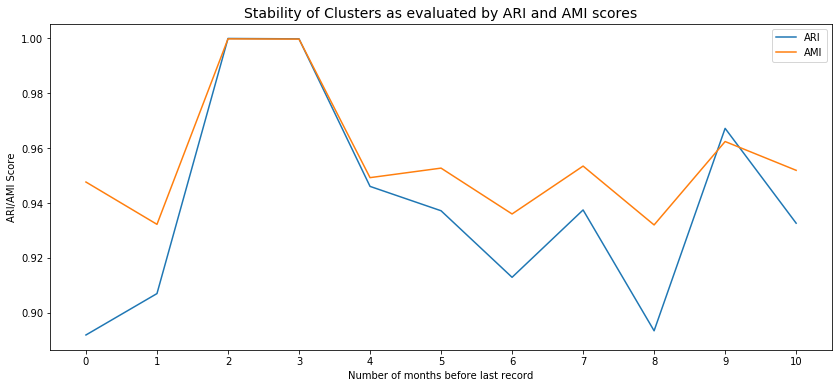

In [62]:
plt.plot(ari_scores, label='ARI')
plt.plot(ami_scores, label='AMI')
plt.xticks(range(0, len(ari_scores)))
plt.title('Stability of Clusters as evaluated by ARI and AMI scores', fontsize=14)
plt.xlabel('Number of months before last record')
plt.ylabel('ARI/AMI Score')
plt.legend()
plt.show()

<b>Conclusion</b>: We see a drop in the score after 1 month and then a stability. As such, I would recommend one month as a good review period for the clusters.